<center><img src="https://is1-ssl.mzstatic.com/image/thumb/Purple122/v4/05/e7/67/05e76784-3364-b535-7e20-b3f4946a56b6/AppIcon-0-0-1x_U007emarketing-0-0-0-7-0-0-sRGB-0-0-0-GLES2_U002c0-512MB-85-220-0-0.png/434x0w.webp" style="height:150px"></center>

<hr style="border-width:2px;border-color:red">
<center><h1>Test Technique Data Scientist</h1></center>
<center><h2> Mesure de la dérive </h2></center>
<hr style="border-width:2px;border-color:red">

# Contexte

La **dérive** en apprentissage automatique (ou **"drift"** en anglais) fait référence à un **changement dans les données d'entrée ou de sortie d'un modèle** de machine learning **après son entraînement initial**. Cela peut se produire lorsque les données utilisées pour entraîner le modèle ne **reflètent plus la réalité**, ou lorsque **les conditions du problème changent de manière significative**.

La dérive des données peut affecter la précision du modèle de manière significative et peut entraîner des erreurs coûteuses dans les prévisions ou les décisions basées sur le modèle. Par conséquent, **il est important de surveiller régulièrement les performances du modèle** et de le mettre à jour en fonction des nouveaux jeux de données ou des nouvelles conditions du problème.

# Objectif

Dans ce test, vous allez implémenter des métriques permettant de mesurer la dérive d'un modèle dans un usecase de **e-commerce** où nous essayons de prédire le **panier total** (variable **`TotalCart`** : chiffre d'affaire total d'un client sur la période donnée) des clients en fonction des variables suivantes:
* **`Age`** : âge du client en années.
* **`Seniority`** : ancienneté du client en années.
* **`Orders`** : Nombre de commandes effectuées sur la période précédente.
* **`Items`** : Nombre d'items commandés sur la période précédente.
* **`AverageDiscount`** : Réduction moyenne accordée au client sur la période précédente en pourcentage.
* **`TopCategory`** : Catégorie de produits favorite du client.
* **`BrowsingTime`** : Temps total passé sur le site web sur la période précédente en secondes.
* **`EmailsOpened`** : Nombre de mails marketing ouverts par le client sur la période précédente.
* **`SupportInteractions`** : Nombre d'interactions que le client a eu avec le service client sur la période précédente.

Le jeu de données est décomposé en 4 périodes correspondant aux 4 trimestres de l'année 2022. Vous trouverez les données correspondant à chaque période dans les fichiers **`period_0.csv`**, **`period_1.csv`**, ..., **`period_3.csv`**.

Vous allez d'abord **entraîner et évaluer un modèle de machine learning** sur les données de la **période 0**. On supposera que ce modèle sera utilisé pour effectuer les prédictions de panier total sur toute l'année 2022.

Ensuite, vous devrez **implémenter des métriques de dérive** qui vous seront données et **effectuer une analyse** de celle-ci.

# Entraînement du modèle

* **Entraînez et validez** deux ou trois modèles de votre choix sur les données de la période 0. 

**Conseils**

* Vous serez évalué sur votre **rigueur** et non sur les performances du modèle.


* Il n'est pas nécessaire de faire une analyse exploratoire des données.


* Il n'est pas nécessaire de faire de recherche d'hyperparamètres optimaux non plus mais vous pouvez le faire si vous le souhaitez.

* **Entrainez votre modèle sur toute la période 0** puis **testez votre modèle** sur les données des **périodes 1, 2 et 3**. Comment évolue la performance du modèle?

On importe les modules nécessaires pour la construction de nos modèles.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras

On charge le jeu de données correspondant au 1er trimestre de l'année 2022 et on vérifie qu'il n'y a aucune valeur manquante.

In [10]:
period_0_train = pd.read_csv('period_0.csv')
period_0_train.isnull().sum()

Age                    0
Seniority              0
Orders                 0
Items                  0
AverageDiscount        0
TopCategory            0
BrowsingTime           0
EmailsOpened           0
SupportInteractions    0
TotalCart              0
dtype: int64

On divise le jeu de données avec d'un côté la variable que l'on veut prédire qui correspond au chiffre d'affaire total d'un client sur la période 0 (y_train), et d'un autre côté les variables prédictives qui vont nous servir à prédire la variable 'TotalCart' (period_0_train).

In [11]:
y_train = period_0_train.iloc[:,9]
period_0_train.drop(period_0_train.columns[9], axis = 1, inplace = True)
period_0_train.head()

,Age,Seniority,Orders,Items,AverageDiscount,TopCategory,BrowsingTime,EmailsOpened,SupportInteractions
0,21,2,4,7,0.14,"Clothing,Shoes & Jewelry",68.473629,3,2
1,22,0,4,5,0.50,Toys & Games,29.258063,1,0
2,22,1,2,6,0.37,"Health, Household & Baby Care",11.515517,0,0
3,19,0,2,8,0.60,Toys & Games,74.495861,1,0
4,25,1,1,5,0.58,Toys & Games,1.682705,2,1


On fait de même pour les semestres 1, 2 et 3.

In [12]:
period_1_test = pd.read_csv('period_1.csv')
y_test_1 = period_1_test.iloc[:,9]
period_1_test.drop(period_1_test.columns[9], axis = 1, inplace = True)

In [13]:
period_2_test = pd.read_csv('period_2.csv')
y_test_2 = period_2_test.iloc[:,9]
period_2_test.drop(period_2_test.columns[9], axis = 1, inplace = True)

In [14]:
period_3_test = pd.read_csv('period_3.csv')
y_test_3 = period_3_test.iloc[:,9]
period_3_test.drop(period_3_test.columns[9], axis = 1, inplace = True)

On remarque que la colonne 'TopCategory' de notre jeu de données présente des données de type différent des autres colonnes. Pour remédier à ce problème, on remplace les variables définies par des chaînes de caractères par plusieurs nouvelles variables définies par des entiers avec une nouvelle variable par chaîne de caractères différente.

In [15]:
period_0_train = pd.get_dummies(period_0_train)

De plus, certaines variables présentent des valeurs définies dans des échelles relativement différentes par rapport aux autres. Ainsi, on va procéder à la normalisation de l'ensemble des variables.

In [16]:
period_0_train = preprocessing.StandardScaler().fit_transform(period_0_train)

On fait de même pour les semestres 1, 2 et 3.

In [17]:
period_1_test = pd.get_dummies(period_1_test)
period_1_test = preprocessing.StandardScaler().fit_transform(period_1_test)

In [18]:
period_2_test = pd.get_dummies(period_2_test)
period_2_test = preprocessing.StandardScaler().fit_transform(period_2_test)

In [19]:
period_3_test = pd.get_dummies(period_3_test)
period_3_test = preprocessing.StandardScaler().fit_transform(period_3_test)

On choisit comme premier modèle simple, un modèle de régression linéaire sur lequel on va entraîner nos données.

In [20]:
reg_lin_alg = LinearRegression()
reg_lin_alg_mod = reg_lin_alg.fit(period_0_train, y_train)
reg_lin_alg_mod

LinearRegression()

On regarde les performances de notre modèle sur les périodes 1, 2 et 3 avec les métriques 'Mean squared error' et 'R2 score'. 

In [28]:
period_1_test_pred = reg_lin_alg_mod.predict(period_1_test)
period_1_mse = mean_squared_error(y_test_1, period_1_test_pred)
period_1_r2_score = r2_score(y_test_1, period_1_test_pred)
print("Mean squared error pour le semestre 2 : ", round(period_1_mse,2))
print("R2 score pour le semestre 2 : ", round(period_1_r2_score,2))

Mean squared error pour le semestre 2 :  82.79
R2 score pour le semestre 2 :  0.77


In [29]:
period_2_test_pred = reg_lin_alg_mod.predict(period_2_test)
period_2_mse = mean_squared_error(y_test_2, period_2_test_pred)
period_2_r2_score = r2_score(y_test_2, period_2_test_pred)
print("Mean squared error pour le semestre 3 : ", round(period_2_mse,2))
print("R2 score pour le semestre 3 : ", round(period_2_r2_score,2))

Mean squared error pour le semestre 3 :  107.63
R2 score pour le semestre 3 :  0.72


In [30]:
period_3_test_pred = reg_lin_alg_mod.predict(period_3_test)
period_3_mse = mean_squared_error(y_test_3, period_3_test_pred)
period_3_r2_score = r2_score(y_test_3, period_3_test_pred)
print("Mean squared error pour le semestre 4 : ", round(period_3_mse,2))
print("R2 score pour le semestre 4 : ", round(period_3_r2_score,2))

Mean squared error pour le semestre 4 :  229.01
R2 score pour le semestre 4 :  0.58


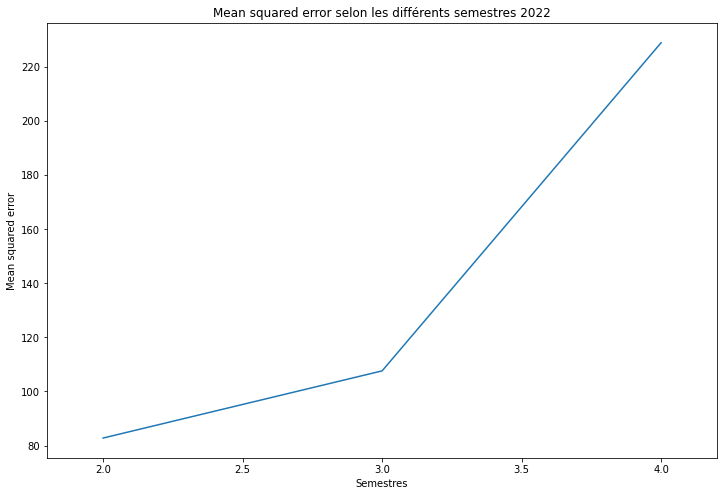

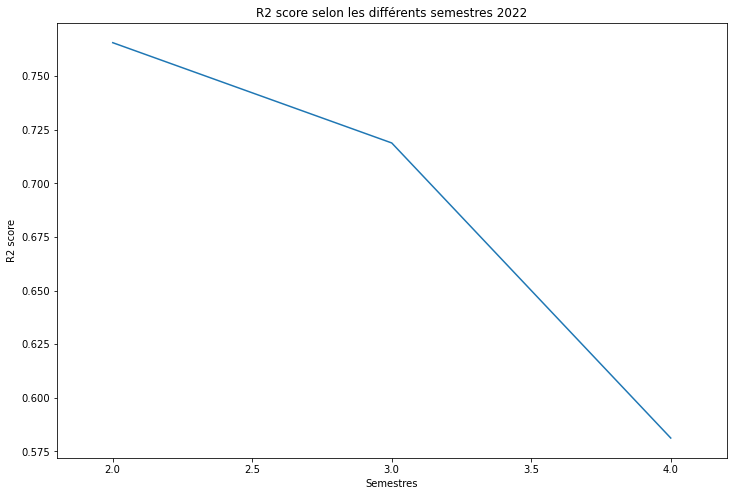

In [38]:
plt.figure(figsize=(12,8))
plt.plot([2, 3, 4], [period_1_mse, period_2_mse, period_3_mse])
plt.gca().set_xlim([1.8,4.2])
plt.xlabel('Semestres')
plt.ylabel("Mean squared error")
plt.title("Mean squared error selon les différents semestres 2022")
plt.show()
plt.figure(figsize=(12,8))
plt.plot([2, 3, 4], [period_1_r2_score, period_2_r2_score, period_3_r2_score])
plt.gca().set_xlim([1.8,4.2])
plt.xlabel('Semestres')
plt.ylabel("R2 score")
plt.title("R2 score selon les différents semestres 2022")
plt.show()

On constate que le MSE, autrement dit la moyenne des écarts au carré entre les valeurs prédites et les valeurs observées, augmente entre le semestre 2 et 3 (de 82,79 à 107,63 soit une augmentation de 30%), et augmente de manière encore plus significative entre le semestre 3 et 4 (de 107,63 à 229,01 soit une augmentation de 112,78%!).
De plus, on observe également une diminution du R2 entre le semestre 2 et 3 (de 0,77 à 0,72), puis entre le semestre 3 et 4 (de 0,72 à 0,58), ce qui se traduit par des prédictions qui sont de plus en plus mauvaises puisqu'elles ont tendance à refléter davantage la moyenne des observations au fur et à mesure des semestres.

Maintenant, on va se pencher sur un modèle plus complexe, en l'occurence sur un réseau de neurones avec la classe Sequential API.

On définit la structure de notre réseau de neurones de la manière suivante. On créé un réseau de neurones pour lequel les couches sont connectées les unes aux autres de manière linéaire. La couche d'entrée prend en argument nos données d'entraînement, sur lesquelles on va appliquer une méthode de régularisation de type Dropout, avec une probabilité de 0,3 de désactivation d'un neurone en entrée. On va ensuite appliquer 4 couches de type Dense, une première composée de 60 neurones appliquant la fonction d'activation 'Relu', une seconde composée de 30 neurones appliquant la fonction d'activation 'Relu', une troisième composée de 10 neurones appliquant la fonction d'activation 'Relu', et enfin une quatrième composée d'un seul neurone en sortie.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape = period_0_train.shape[1]))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(60, activation = "relu"))
model.add(keras.layers.Dense(30, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "relu"))
model.add(keras.layers.Dense(1))

On compile notre réseau de neurones en utilisant comme fonction loss le MSE, comme fonction d'optimisation le RMSprop, et comme métrique de performance le MAE.

In [34]:
model.compile(loss = "mse", optimizer = "rmsprop", metrics = ["mae"])

On entraîne maintenant notre modèle avec 70 itérations, en séparant le jeu de données en données d'entraînement qui serviront à entraîner notre modèle, et en données de validation qui permettront d'évaluer les performances de notre réseau de neurone à la fin de chaque itération.

In [35]:
results = model.fit(period_0_train, y_train, epochs = 70, validation_split = 0.3)

Train on 700 samples, validate on 300 samples
Epoch 1/70
700/700 [==============================] - 1s 1ms/sample - loss: 1530.2198 - mae: 34.9219 - val_loss: 1367.8612 - val_mae: 33.0079
Epoch 2/70
700/700 [==============================] - 0s 149us/sample - loss: 1285.2187 - mae: 31.5900 - val_loss: 1108.0407 - val_mae: 29.1516
Epoch 3/70
700/700 [==============================] - 0s 159us/sample - loss: 957.0732 - mae: 26.2454 - val_loss: 800.0870 - val_mae: 23.7898
Epoch 4/70
700/700 [==============================] - 0s 153us/sample - loss: 651.4471 - mae: 20.5209 - val_loss: 504.0030 - val_mae: 17.5529
Epoch 5/70
700/700 [==============================] - 0s 150us/sample - loss: 392.6358 - mae: 15.0095 - val_loss: 299.0388 - val_mae: 12.6254
Epoch 6/70
700/700 [==============================] - 0s 149us/sample - loss: 279.9513 - mae: 12.5782 - val_loss: 214.8482 - val_mae: 10.3915
Epoch 7/70
700/700 [==============================] - 0s 150us/sample - loss: 232.8283 - mae: 11.234

Epoch 59/70
700/700 [==============================] - 0s 121us/sample - loss: 141.9494 - mae: 7.3078 - val_loss: 84.0631 - val_mae: 6.0388
Epoch 60/70
700/700 [==============================] - 0s 125us/sample - loss: 143.0655 - mae: 7.5587 - val_loss: 81.0711 - val_mae: 5.7844
Epoch 61/70
700/700 [==============================] - 0s 128us/sample - loss: 140.3842 - mae: 7.4362 - val_loss: 80.0628 - val_mae: 5.6363
Epoch 62/70
700/700 [==============================] - 0s 120us/sample - loss: 131.0889 - mae: 7.1536 - val_loss: 87.8318 - val_mae: 6.1669
Epoch 63/70
700/700 [==============================] - 0s 122us/sample - loss: 154.1874 - mae: 7.5847 - val_loss: 83.7475 - val_mae: 5.8032
Epoch 64/70
700/700 [==============================] - 0s 129us/sample - loss: 163.2602 - mae: 7.5040 - val_loss: 82.1980 - val_mae: 5.7427
Epoch 65/70
700/700 [==============================] - 0s 128us/sample - loss: 146.8312 - mae: 7.3604 - val_loss: 95.2123 - val_mae: 6.7509
Epoch 66/70
700/700 

On affiche un récapitulatif de nos résultats suite aux 70 itérations.

C:\Users\doria\anaconda3\envs\TensorFlow\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


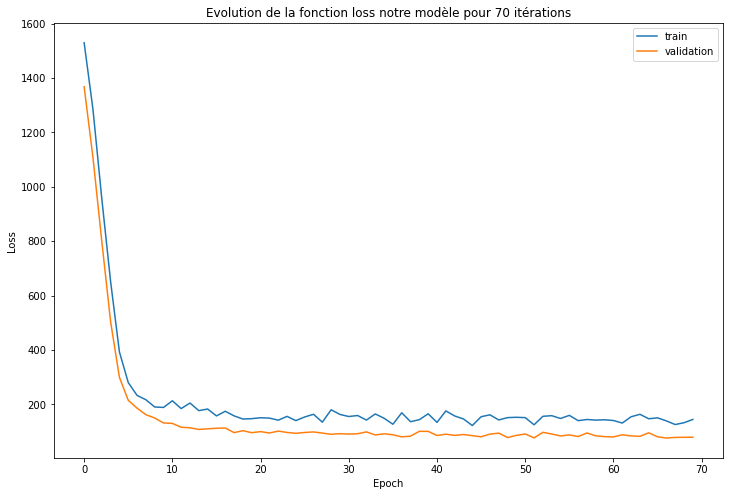

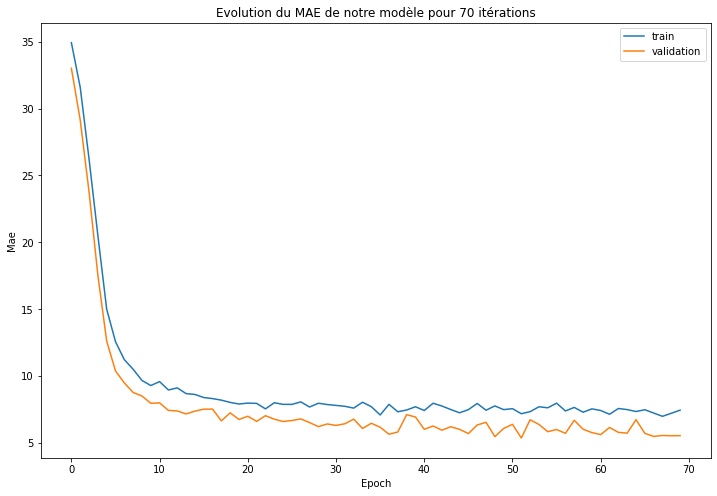

In [39]:
df_loss_mae = pd.DataFrame(results.history)
df_loss= df_loss_mae[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_mae= df_loss_mae[['mae','val_mae']]
df_mae.rename(columns={'mae':'train','val_mae':'validation'},inplace=True)
df_loss.plot(title='Evolution de la fonction loss notre modèle pour 70 itérations',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
plt.show()
df_mae.plot(title='Evolution du MAE de notre modèle pour 70 itérations',figsize=(12,8)).set(xlabel='Epoch',ylabel='Mae')
plt.show()

On regarde maintenant la performance de notre modèle sur les semestres 2, 3 et 4.

In [40]:
score_period_1 = model.evaluate(period_1_test, y_test_1)
print(score_period_1)

1000/1000 [==============================] - 0s 34us/sample - loss: 106.1189 - mae: 7.7685
[106.11889129638672, 7.7684636]


In [41]:
score_period_2 = model.evaluate(period_2_test, y_test_2)
print(score_period_2)

1000/1000 [==============================] - 0s 36us/sample - loss: 131.7716 - mae: 8.7543
[131.77155126953124, 8.754341]


In [42]:
score_period_3 = model.evaluate(period_3_test, y_test_3)
print(score_period_3)

1000/1000 [==============================] - 0s 39us/sample - loss: 259.6751 - mae: 12.8005
[259.675076171875, 12.800545]


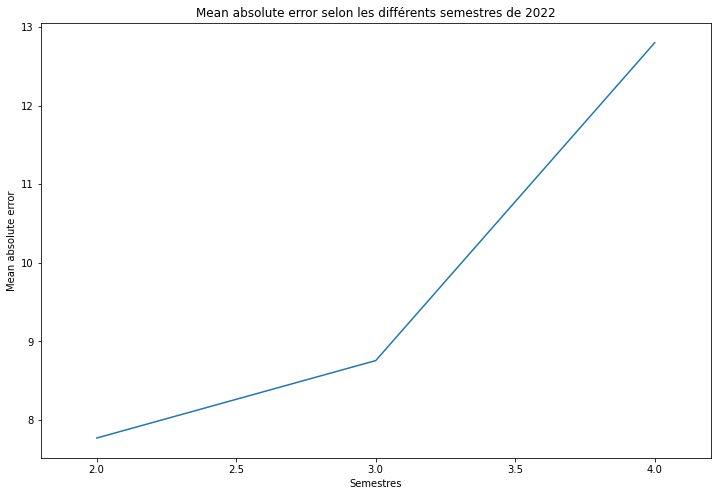

In [44]:
plt.figure(figsize=(12,8))
plt.plot([2, 3, 4], [score_period_1[1], score_period_2[1], score_period_3[1]])
plt.gca().set_xlim([1.8,4.2])
plt.xlabel('Semestres')
plt.ylabel("Mean absolute error")
plt.title("Mean absolute error selon les différents semestres 2022")
plt.show()

On constate que le MAE, qui correspond à la moyenne des écarts entre les valeurs prédites et les valeurs observées en valeur absolut, augmente entre le semestre 2 et 3 (de 7,77 à 8,75 soit une augmentation de 12,61%), et augmente de manière encore plus significative entre le semestre 3 et 4 (de 8,75 à 12,80 soit une augmentation de 46,29%). Cela traduit un appauvrissement de la qualité des prédictions au fur et à mesure des semestres pour le modèle construit sur la période 0.

# Mesure de la dérive de variables catégorielles.

Pour deux distributions de probabilités discrètes $P$ et $Q$, la **divergence de Kullback–Leibler** de $P$ par rapport à $Q$ est définie par:

$$D_\text{KL}(P \parallel Q) = \sum_{x\in\mathcal{X}} P(x) \log\left(\frac{P(x)}{Q(x)}\right)$$


On définit la **divergence de Jensen-Shannon** comme une version lisse et symétrique de la divergence de Kullback-Leiber donnée par la formule suivante:

$${\rm JSD}(P \parallel Q)= \frac{1}{2}D(P \parallel M)+\frac{1}{2}D(Q \parallel M)$$

où $M=\frac{1}{2}(P+Q)$

### Exemple de calcul de $D_\text{KL}(P \parallel Q)$ : 

Soient $P$ =`[0.2, 0.3, 0.5]` et $Q$ =`[0.2, 0.4, 0.4]` deux vecteurs définissant une loi de probabilité discrete. Alors : 

$$
\begin{equation}
\begin{split}
D_\text{KL}(P \parallel Q) & = P(0) \log\left(\frac{P(0)}{Q(0)}\right)
                             + P(1) \log\left(\frac{P(1)}{Q(1)}\right)
                             + P(2) \log\left(\frac{P(2)}{Q(2)}\right)\\ \\
                           & = 0.2 \log\left(\frac{0.2}{0.2}\right)
                             + 0.3 \log\left(\frac{0.3}{0.4}\right)
                             + 0.5 \log\left(\frac{0.5}{0.4}\right) \\ \\
                           & = 0.02526...
\end{split}
\end{equation}
$$

### Exercice

* Implémenter des fonctions nommées **`KLDivergence(P, Q)`** et **`JSDivergence(P, Q)`** permettant de calculer les métriques définies ci-dessus.

**Conseils**:
* Utiliser la librairie Numpy permettant de facilement effectuer des calculs d'algèbre linéaire.

In [1]:
import numpy as np 

P = np.array([0.2, 0.3, 0.5])
Q = np.array([0.2, 0.4, 0.4])

def KLDivergence(P, Q):
    
    d_kl = np.dot(P, np.log(np.divide(P,Q)))
    
    return d_kl

def JSDivergence(P, Q):
    
    d_js = 1/2 * KLDivergence(P, 1/2*(P+Q)) + 1/2 * KLDivergence(Q, 1/2*(P+Q))
    
    return d_js
    

* Lancer la cellule suivante pour tester votre fonction.

In [2]:
print("K-L Divergence:", KLDivergence(P, Q))
print("J-S Divergence:", JSDivergence(P, Q))

K-L Divergence: 0.02526715392157057
J-S Divergence: 0.006367198333995731


# Mesure de la dérive de variables quantitatives.

Soit $P$ une mesure empirique d'échantillons $X_1, \ldots, X_n
$ et $Q$ une mesure empirique d'échantillons $Y_1, \ldots, Y_n$, on définit la **Distance de Wasserstein** d'ordre $p$ par la fonction suivante :

$$W_p(P, Q) = \left( \frac{1}{n}\sum_{i=1}^n \|X_{(i)} - Y_{(i)}\|^p \right)^{1/p}$$

où $X_{(1)}, \ldots, X_{(n)}$ et $Y_{(1)}, \ldots, Y_{(n)}$ sont les [**statistiques d'ordre**](https://en.wikipedia.org/wiki/Order_statistic#Notation_and_examples) des échantillons $X$ et $Y$ et $p$ un nombre entier positif.

### Exercice

* Implémenter une fonction nommée **`WassersteinDistance(X, Y, p)`** permettant de calculer cette métrique à l'ordre **`p`** à partir de **deux échantillons** **`X`** et **`Y`** que l'on supposera de même longueur.

**Conseils**:
* Vous pouvez trier les échantillons pour obtenir les statistiques d'ordre.

In [47]:
def WassersteinDistance(X, Y, p):
    
    d_w = np.power(np.divide(1, Y.shape[0]) * np.linalg.norm(X-Y, p), 1/p)
    
    return d_w
    

* Lancer la cellule suivante pour tester votre fonction.

In [48]:
X = np.random.beta(2, 6, 100)

Y = np.random.beta(3, 6, 100)

WassersteinDistance(X, Y, 2)

0.14912986455622182

# Étude de la dérive du modèle.

* En vous appuyant sur les métriques définies précédemment, illustrez et analysez visuellement la **dérive des données** ainsi que **la dérive du modèle** sur les périodes **1 à 3**. 


* Commenter les visualisations et déterminer si le modèle doit être mis à jour ou si sa performance est toujours acceptable. 

**Conseils**:
* Vous serez évalué sur **la rigueur et le soin** que vous donnerez à votre analyse, et sur **vos capacités à synthéthiser votre étude**. Vous ne serez pas évalué sur vos conclusions.


* Vous pouvez normaliser les données par rapport aux **moyennes et variances que vous calculerez sur la période 0** pour que les distances de Wasserstein pour différentes variables soient facilement comparables.

On calcule la distance de Wasserstein pour les valeurs prédites avec la régression linéaire et les valeurs observées sur les différents semestres avec p = 2.

In [53]:
wd1 = WassersteinDistance(y_test_1, period_1_test_pred, 2)
wd2 = WassersteinDistance(y_test_2, period_2_test_pred, 2)
wd3 = WassersteinDistance(y_test_3, period_3_test_pred, 2)
print(round(wd1,3), round(wd2,3), round(wd3,3))

0.536 0.573 0.692


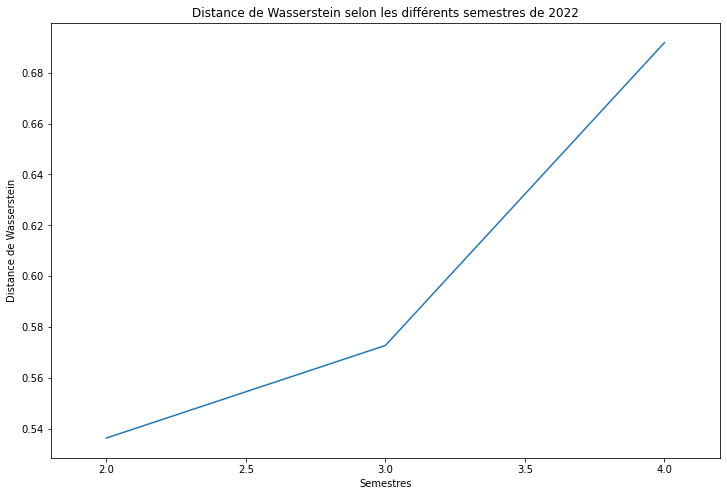

In [50]:
plt.figure(figsize=(12,8))
plt.plot([2, 3, 4], [wd1, wd2, wd3])
plt.gca().set_xlim([1.8,4.2])
plt.xlabel('Semestres')
plt.ylabel("Distance de Wasserstein")
plt.title("Distance de Wasserstein selon les différents semestres 2022")
plt.show()

### Conclusion : 

Le modèle de régression linéaire que l'on a entraîné sur les données de la période 0 donne des prédictions correctes sur la période 1 avec un MSE de 82,79 et un R2 score de 0,77. Cependant, on observe une augmentation du MSE sur la période qui suit (107,63) ainsi qu'une baisse du R2 (0,72). Cette tendance est d'autant plus flagrante à la période 3 avec augmentation du MSE jusqu'à 229,01 et une chute du R2 à 0,58. 

Le réseau de neurones donne des résultats similaires about de 70 itérations avec une augmentation de plus en plus importante du MAE allant de 7,77 à 8,75 entre la période 1 et 2, puis de 8,75 à 12,80 entre la période 2 et 3.

La distance de Wasserstein, appliquée sur les valeurs prédites et les valeurs observées sur les différents semestres, confirme cette tendance, ce qui se traduit par une dérive de plus en plus importante du modèle qui prédit de plus en plus mal le chiffre d'affaire total d'un client au fur et à mesure des semestres, ce qui nécessiterait une mise à jour du modèle.